In [ ]:
# Tanzim Hasan
# 2018200000038
# Artificial Intelligence__CSE4041.1	

!mkdir -p ~/.kaggle #creates a directory
!cp kaggle.json ~/.kaggle/ #copies the file kaggle.json to the directory

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats #download dataset from Kaggle

 98% 1.04G/1.06G [00:04<00:00, 278MB/s]
100% 1.06G/1.06G [00:04<00:00, 232MB/s]


In [ ]:
import zipfile #  functionality to handle zip files
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') # passing the path to the zip file
zip_ref.extractall('/content') #Calls for passing the target directory
zip_ref.close() #close the zip archive after it has been extracted.

#Model

In [ ]:
import tensorflow as tf #  imports the TensorFlow library
from tensorflow import keras # keras high-level neural networks API
from keras import Sequential #The Sequential model is a linear stack of layers, where we can use one or multiple layers to form a complete model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout #Dense: A dense layer implements a denseDense: A dense layer implements a dense #Conv2D: A 2D convolution layer that applies a sliding filter to the input to extract local features #MaxPooling2D maximum value over a pooling window.#Flatten: A layer that flattens the input tensor into a 1D tensor.#BatchNormalization: A layer that normalizes the input tensor # Dropout: A layer that applies dropout to the input

In [ ]:
# generators (keras)
#raining dataset generator using the image_dataset_from_directory function from the keras.utils module.
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', #The path to the directory containing the images.
    labels='inferred',#Specifies how to infer the labels of the images.
    label_mode = 'int', # The format of the labels returned by the generator
    batch_size=32,# The number of images per batch.
    image_size=(256,256) #The size to which the images should be resized.
)
# for validation
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',#The path to the directory containing the images.
    labels='inferred', ##Specifies how to infer the labels of the images.
    label_mode = 'int',## The format of the labels returned by the generator
    batch_size=32,## The number of images per batch.
    image_size=(256,256)#The size to which the images should be resized.
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32) #Cast the image to a tf.float32 data type.Divide the image by 255.0 to normalize the pixel values to the range [0, 1].
    return image,label # Return the normalized image and label.

train_ds = train_ds.map(process) #map method transforms each element in the dataset
validation_ds = validation_ds.map(process) #map method transforms each element in the dataset

In [ ]:
# create CNN model & also reduce overfit by adding BatchNormalization

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #layer with 32 filters, a kernel_size of (3,3), a padding of 'valid', and a relu activation function.
model.add(BatchNormalization()) #For controling overfiting of data
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #layer with a pool_size of (2,2) and a strides of 2

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #For controling overfiting of data
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #layer with a pool_size of (2,2) and a strides of 2

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization()) #For controling overfiting of data
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #layer with a pool_size of (2,2) and a strides of 2

model.add(Flatten()) # layer to convert the high-dimensional output of the previous layer into a one-dimensional vector.

model.add(Dense(128,activation='relu'))#layer with 128 units and a relu activation function.
model.add(Dropout(0.1)) ##For controling overfiting of data
model.add(Dense(64,activation='relu')) #layer with 64 units and a relu activation function.
model.add(Dropout(0.1)) ##For controling overfiting of data
model.add(Dense(1,activation='sigmoid')) # layer with 1 unit and a sigmoid activation function, which outputs a binary classification probability.

In [ ]:
model.summary() #summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #The model.compile function sets up the model's training process

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds) #The model.fit function trains the model on the given data.

Epoch 1/10
625/625 [==============================] - 86s 121ms/step - loss: 1.0561 - accuracy: 0.6022 - val_loss: 0.6640 - val_accuracy: 0.5984
Epoch 2/10
625/625 [==============================] - 74s 118ms/step - loss: 0.5673 - accuracy: 0.7144 - val_loss: 0.5431 - val_accuracy: 0.7354
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4808 - accuracy: 0.7705 - val_loss: 0.5132 - val_accuracy: 0.7394
Epoch 4/10
625/625 [==============================] - 74s 118ms/step - loss: 0.4100 - accuracy: 0.8170 - val_loss: 0.4613 - val_accuracy: 0.7860
Epoch 5/10
625/625 [==============================] - 74s 117ms/step - loss: 0.3446 - accuracy: 0.8458 - val_loss: 0.5604 - val_accuracy: 0.7234
Epoch 6/10
625/625 [==============================] - 73s 116ms/step - loss: 0.2927 - accuracy: 0.8787 - val_loss: 0.5385 - val_accuracy: 0.7878
Epoch 7/10
625/625 [==============================] - 73s 116ms/step - loss: 0.1850 - accuracy: 0.9275 - val_loss: 0.5724 - val_ac

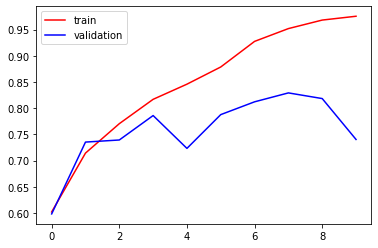

In [ ]:
# tranning improving but validation not / overfiting
#epoc increasing & training improving
#This code plots the accuracy of the model during training and validation. The history.history attribute is a dictionary that contains the history of all metrics monitored during training, including accuracy.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train') # #The plt.plot function is used to plot the accuracy values
plt.plot(history.history['val_accuracy'],color='blue',label='validation') #The color argument specifies the color of the plot #  The label argument specifies the label of the plot
plt.legend() # The plt.legend function adds a legend to the plot
plt.show() # function displays the plot.

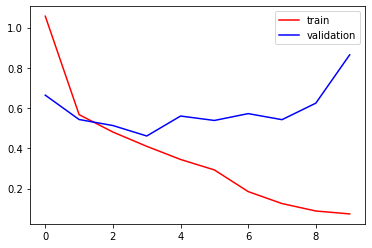

In [ ]:
# over fit..tranning good / test not good
# epoc increasing 
plt.plot(history.history['loss'],color='red',label='train') # #The plt.plot function is used to plot the accuracy values
plt.plot(history.history['val_loss'],color='blue',label='validation') #The color argument specifies the color of the plot #  The label argument specifies the label of the plot
plt.legend() # The plt.legend function adds a legend to the plot
plt.show() # function displays the plot.

In [ ]:
# ways to reduce overfitting
# Add more data
# #Dropout
# #Batch Norm


In [ ]:
import cv2 # import opencv # The cv2 library provides a large number of functions for computer vision tasks, such as object detection, image filtering, and feature extraction

In [ ]:
test_img = cv2.imread('/content/cat.jpeg') # The function reads the image file and returns a matrix representation of the image

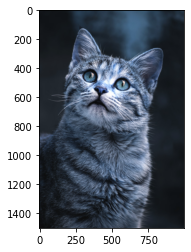

In [ ]:
plt.imshow(test_img) # matplotlib library to display the image.

In [ ]:
test_img.shape #The .shape attribute returns the dimensions of an array in the form of a tuple

(1500, 1000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256)) # resizing the image 

In [ ]:
test_input = test_img.reshape((1,256,256,3)) # used to change the shape of an array #The 1 at the beginning of the shape is the number of samples in a batch, so this reshaped array represents a single sample batch of a 256x256 image with 3 color channels.

In [ ]:
model.predict(test_input) #make predictions on a new test image

1/1 [==============================] - 0s 25ms/step


array([[0.]], dtype=float32)